In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import sqlite3
import altair as alt
 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
conn = sqlite3.connect('/content/drive/MyDrive/wildfire/FPA_FOD_20170508.sqlite')
fires = pd.read_sql("""SELECT * FROM fires""", con=conn)

In [6]:
fires

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2453403.50,33,1300,9.00,Miscellaneous,2453403.50,33.00,1730,0.10,A,40.04,-121.01,5.00,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2453137.50,133,0845,1.00,Lightning,2453137.50,133.00,1530,0.25,A,38.93,-120.40,5.00,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,None,None,None,None,None,2004,2453156.50,152,1921,5.00,Debris Burning,2453156.50,152.00,2024,0.10,A,38.98,-120.74,13.00,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2453184.50,180,1600,1.00,Lightning,2453189.50,185.00,1400,0.10,A,38.56,-119.91,5.00,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2453184.50,180,1600,1.00,Lightning,2453189.50,185.00,1200,0.10,A,38.56,-119.93,5.00,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,591814,009371,None,ODESSA 2,None,None,None,None,None,2015,2457291.50,269,1726,13.00,Missing/Undefined,2457291.50,269.00,1843,0.01,A,40.48,-122.39,13.00,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...
1880461,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,569419,000366,None,None,None,None,None,None,None,2015,2457300.50,278,0126,9.00,Miscellaneous,nan,nan,None,0.20,A,37.62,-120.94,12.00,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880462,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,574245,000158,None,None,None,None,None,None,None,2015,2457144.50,122,2052,13.00,Missing/Undefined,nan,nan,None,0.10,A,37.62,-120.94,12.00,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880463,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,570462,000380,None,None,None,None,None,None,None,2015,2457309.50,287,2309,13.00,Missing/Undefined,nan,nan,None,2.00,B,37.67,-120.90,12.00,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...


In [7]:
x = fires[['DISCOVERY_DOY','FIRE_YEAR','LATITUDE','LONGITUDE']]
x

,DISCOVERY_DOY,FIRE_YEAR,LATITUDE,LONGITUDE
0,33,2005,40.04,-121.01
1,133,2004,38.93,-120.40
2,152,2004,38.98,-120.74
3,180,2004,38.56,-119.91
4,180,2004,38.56,-119.93
...,...,...,...,...
1880460,269,2015,40.48,-122.39
1880461,278,2015,37.62,-120.94
1880462,122,2015,37.62,-120.94
1880463,287,2015,37.67,-120.90


In [8]:
y = fires['FIRE_SIZE_CLASS']
y

0          A
1          A
2          A
3          A
4          A
          ..
1880460    A
1880461    A
1880462    A
1880463    B
1880464    A
Name: FIRE_SIZE_CLASS, Length: 1880465, dtype: object

In [9]:
x.dtypes

DISCOVERY_DOY      int64
FIRE_YEAR          int64
LATITUDE         float64
LONGITUDE        float64
dtype: object

In [10]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [13]:
from sklearn.preprocessing import LabelEncoder
y_train,y_test = prepare_targets(y_train,y_test)

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
import keras
from matplotlib import pyplot as plt
history = model.fit(X_train, y_train, validation_split = 0.1, epochs=10, batch_size=10)


Epoch 1/10
135394/135394 [==============================] - 325s 2ms/step - loss: 0.3096 - accuracy: 0.5154 - val_loss: -29.5738 - val_accuracy: 0.4994
Epoch 2/10
135394/135394 [==============================] - 324s 2ms/step - loss: -83.7441 - accuracy: 0.5115 - val_loss: -353.6496 - val_accuracy: 0.5008
Epoch 3/10
135394/135394 [==============================] - 323s 2ms/step - loss: -625.5093 - accuracy: 0.5075 - val_loss: -1726.6741 - val_accuracy: 0.4994
Epoch 4/10
135394/135394 [==============================] - 321s 2ms/step - loss: -2468.7673 - accuracy: 0.5089 - val_loss: -4973.8989 - val_accuracy: 0.5009
Epoch 5/10
135394/135394 [==============================] - 320s 2ms/step - loss: -6331.4688 - accuracy: 0.5114 - val_loss: -10774.6484 - val_accuracy: 0.5436
Epoch 6/10
135394/135394 [==============================] - 320s 2ms/step - loss: -13590.4189 - accuracy: 0.5120 - val_loss: -19818.5547 - val_accuracy: 0.5422
Epoch 7/10
135394/135394 [==============================] -

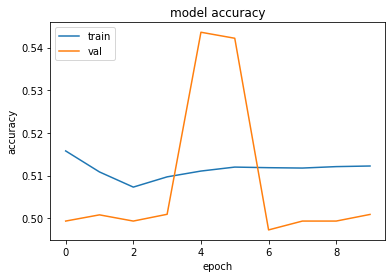

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

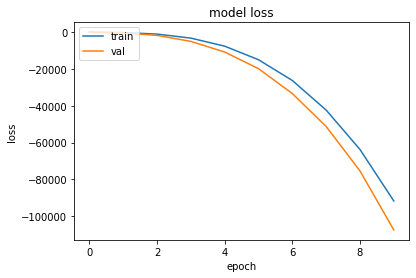

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()